In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [2]:
df = pd.read_csv('./dataset.csv')
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [3]:
df.shape

(736, 33)

In [4]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [5]:
df = df.drop(columns=['Timestamp', 'Permissions'])

In [6]:
df.duplicated().sum()

0

In [7]:
num_cols = []
cat_cols = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
    elif "int" in str(df[i].dtype) or "float" in str(df[i].dtype):
        num_cols.append(i)

print(num_cols)
print(cat_cols)

['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects']


In [8]:
df[num_cols].describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [9]:
df.isna().sum()

,0
Age,1
Primary streaming service,1
Hours per day,0
While working,3
Instrumentalist,4
Composer,1
Fav genre,0
Exploratory,0
Foreign languages,4
BPM,107


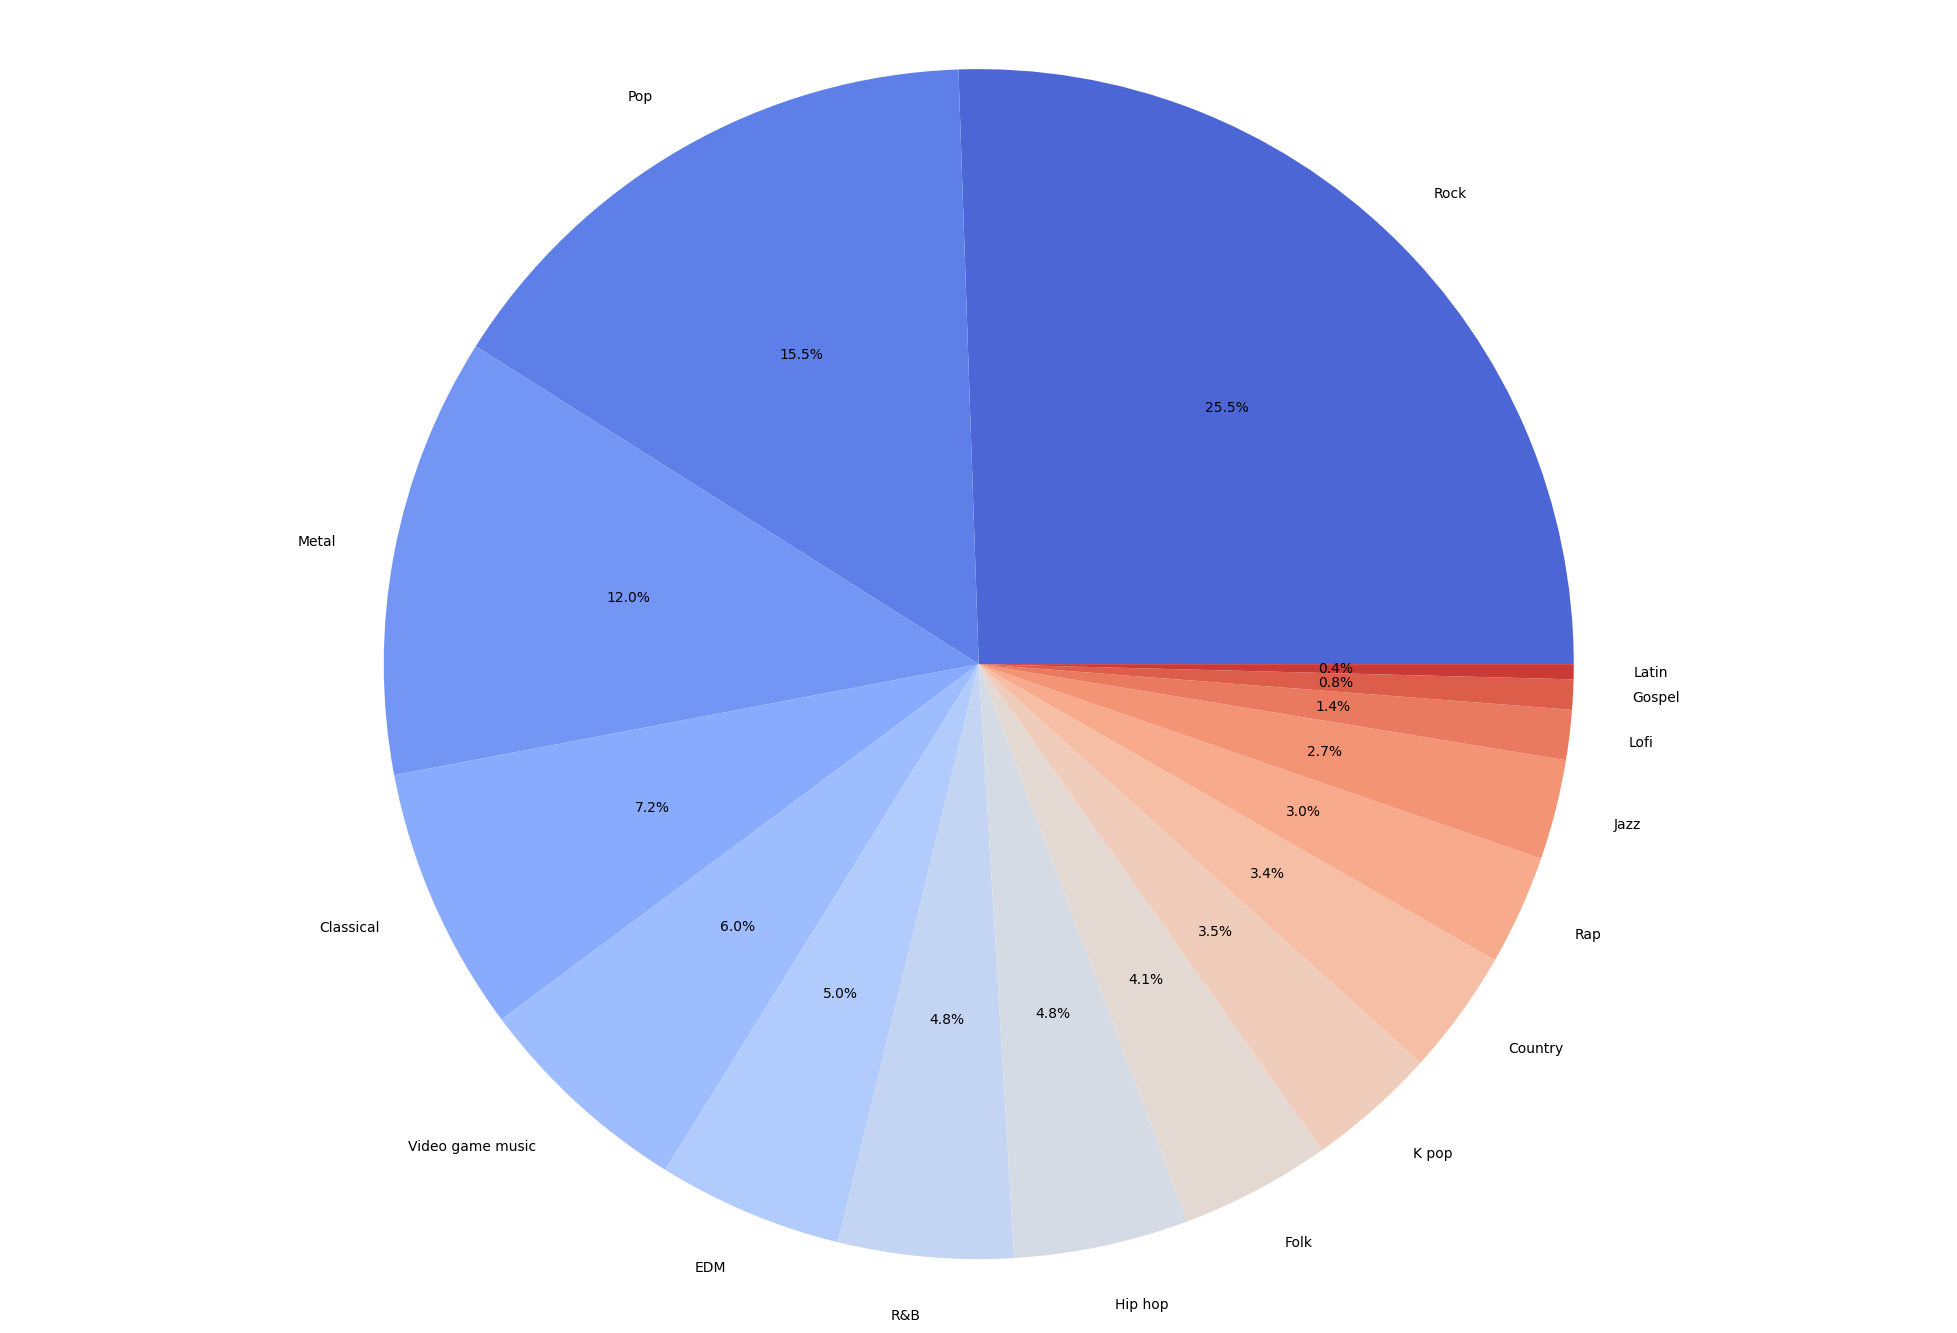

In [10]:
# import seaborn as sns

labels = df['Fav genre'].value_counts().index
sizes = df['Fav genre'].value_counts().values
palette = sns.color_palette("coolwarm", len(sizes))
plt.figure(figsize=(25, 17))

plt.pie(sizes, labels=labels, colors=palette, autopct='%1.1f%%')

plt.axis('equal')
plt.show()

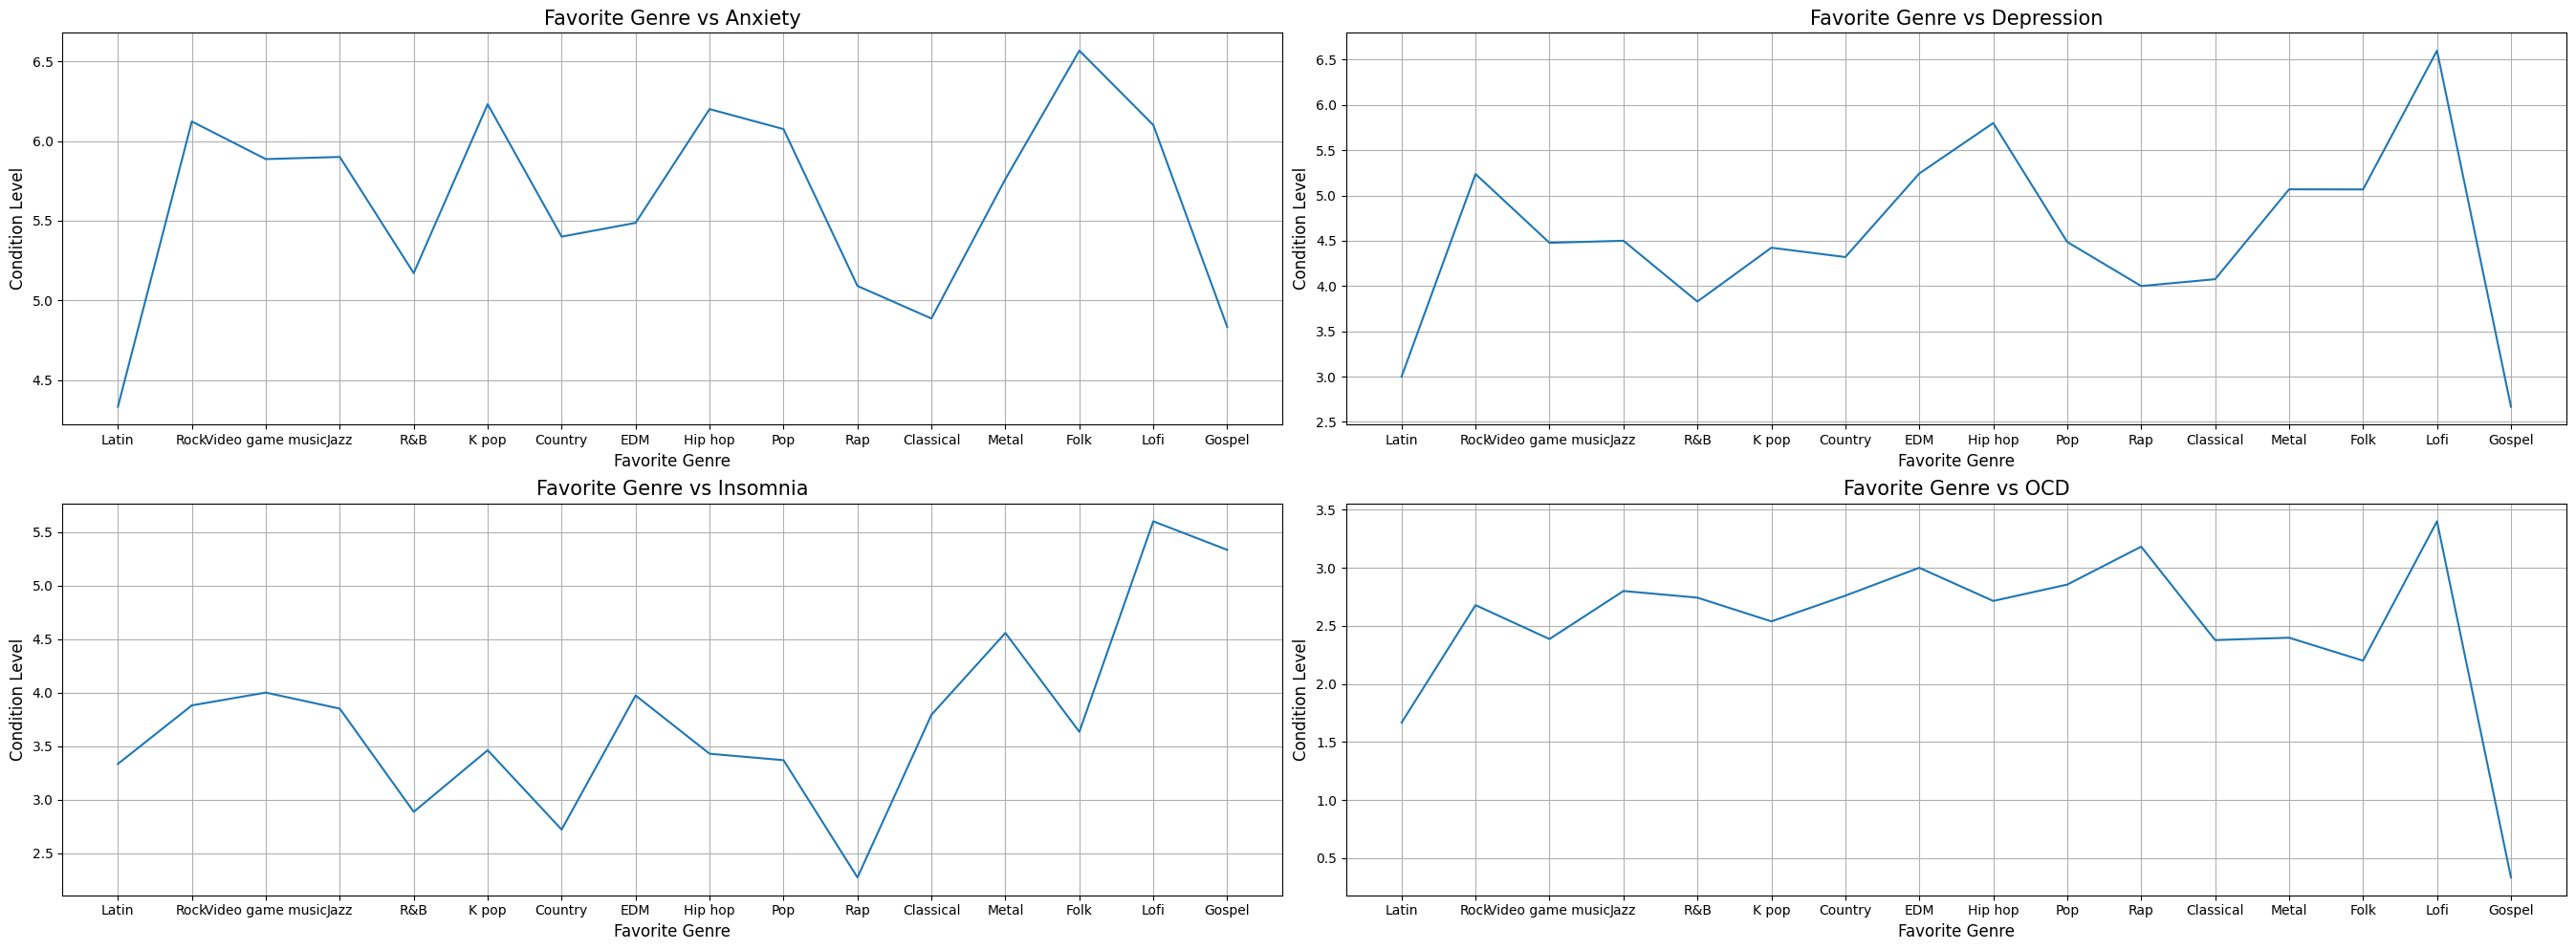

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(27, 10))

sns.lineplot(ax=axes[0, 0], x=df['Fav genre'], y=df['Anxiety'], errorbar=None)
axes[0, 0].set_title("Favorite Genre vs Anxiety", fontsize=15)
sns.lineplot(ax=axes[0, 1], x=df['Fav genre'], y=df['Depression'], errorbar=None)
axes[0, 1].set_title("Favorite Genre vs Depression", fontsize=15)
sns.lineplot(ax=axes[1, 0], x=df['Fav genre'], y=df['Insomnia'], errorbar=None)
axes[1, 0].set_title("Favorite Genre vs Insomnia", fontsize=15)
sns.lineplot(ax=axes[1, 1], x=df['Fav genre'], y=df['OCD'], errorbar=None)
axes[1, 1].set_title("Favorite Genre vs OCD", fontsize=15)

plt.tight_layout()
for ax in axes.flat:
    ax.set_xlabel("Favorite Genre", fontsize=12)
    ax.set_ylabel("Condition Level", fontsize=12)
    ax.grid(True)

plt.show()

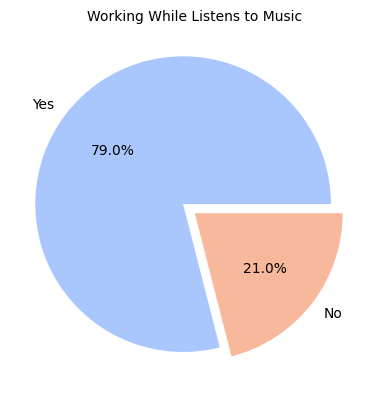

In [12]:
labels = df['While working'].value_counts().index
value = df['While working'].value_counts().values
explode = [0.1, 0]

fig, ax = plt.subplots()
colors = sns.color_palette("coolwarm", len(labels)).as_hex()

ax.pie(value, labels=labels, explode=explode, autopct='%1.1f%%', colors=colors)
plt.title('Working While Listens to Music', fontsize=10)
plt.show()

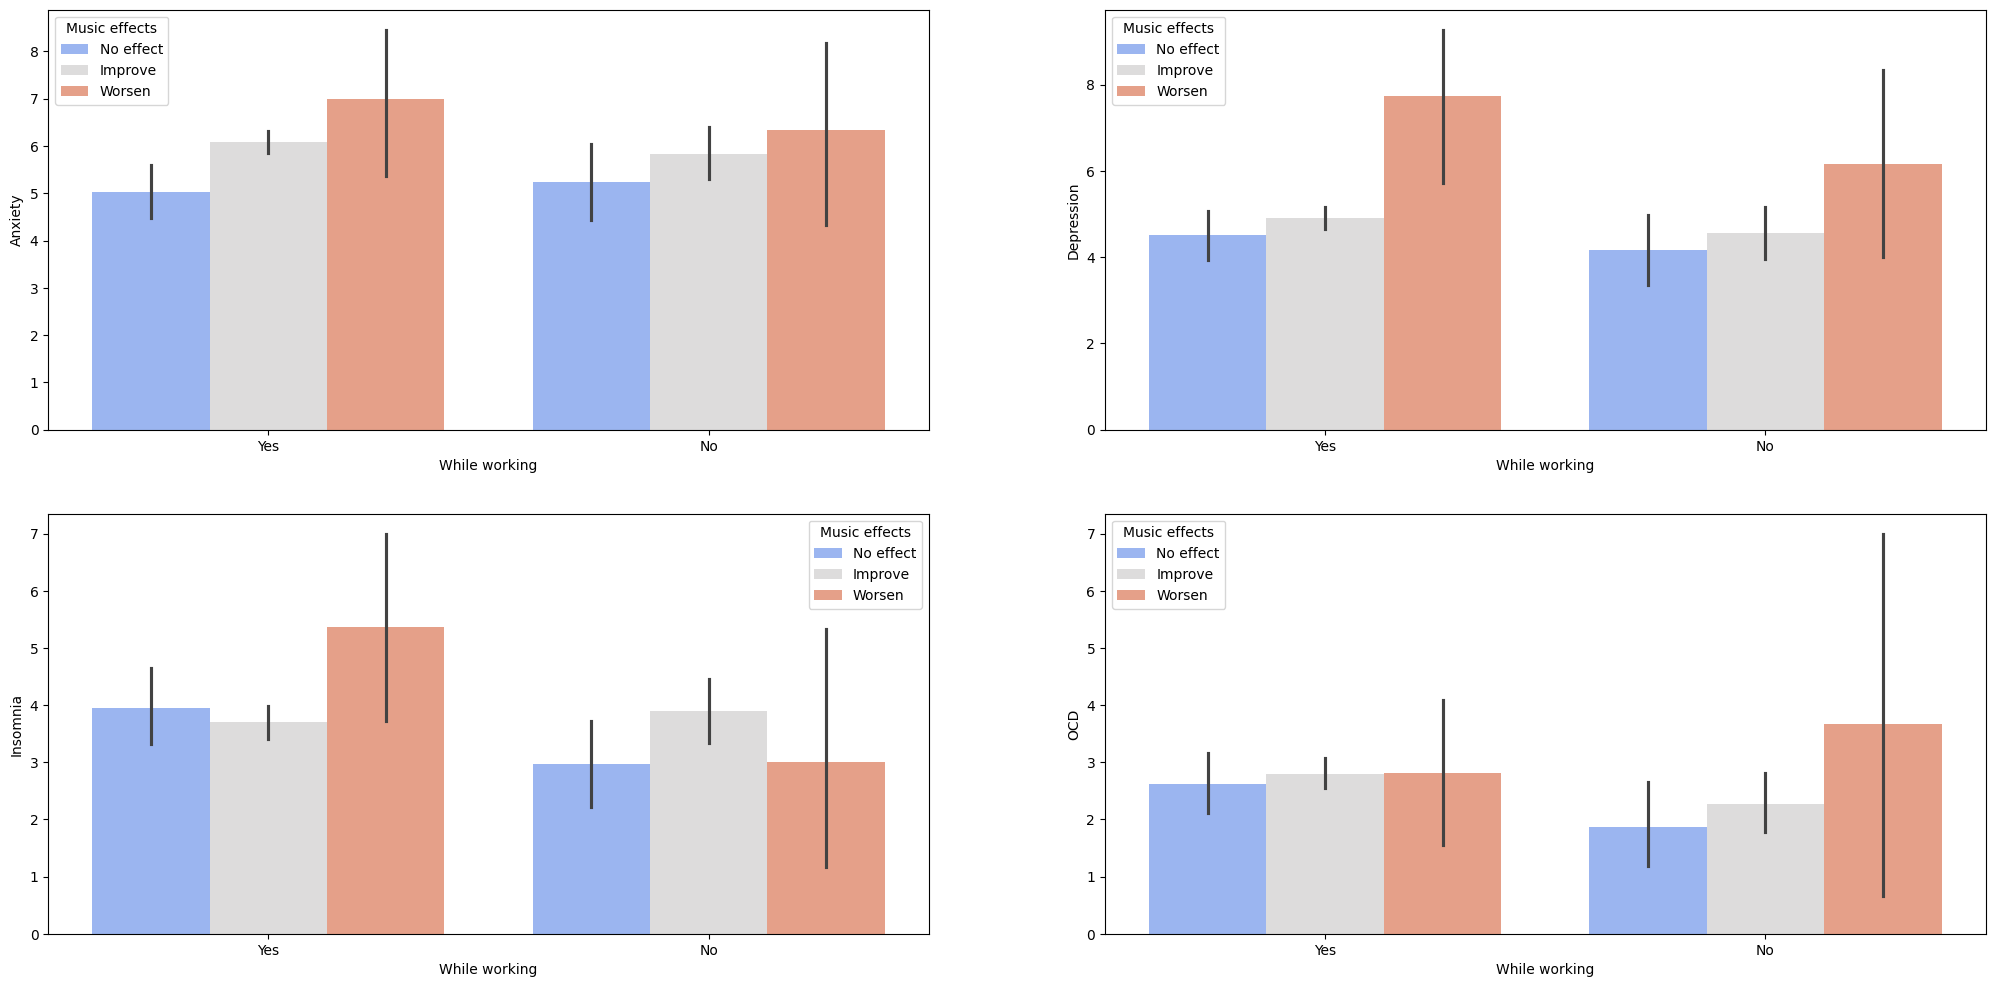

In [13]:
figure,axes=plt.subplots(2,2,figsize=(25,12))
sns.barplot(ax=axes[0,0],x=df['While working'],y=df['Anxiety'],hue=df['Music effects'],palette="coolwarm")
sns.barplot(ax=axes[0,1],x=df['While working'],y=df['Depression'],hue=df['Music effects'],palette="coolwarm")
sns.barplot(ax=axes[1,0],x=df['While working'],y=df['Insomnia'],hue=df['Music effects'],palette="coolwarm")
sns.barplot(ax=axes[1,1],x=df['While working'],y=df['OCD'],hue=df['Music effects'],palette="coolwarm")
plt.show()

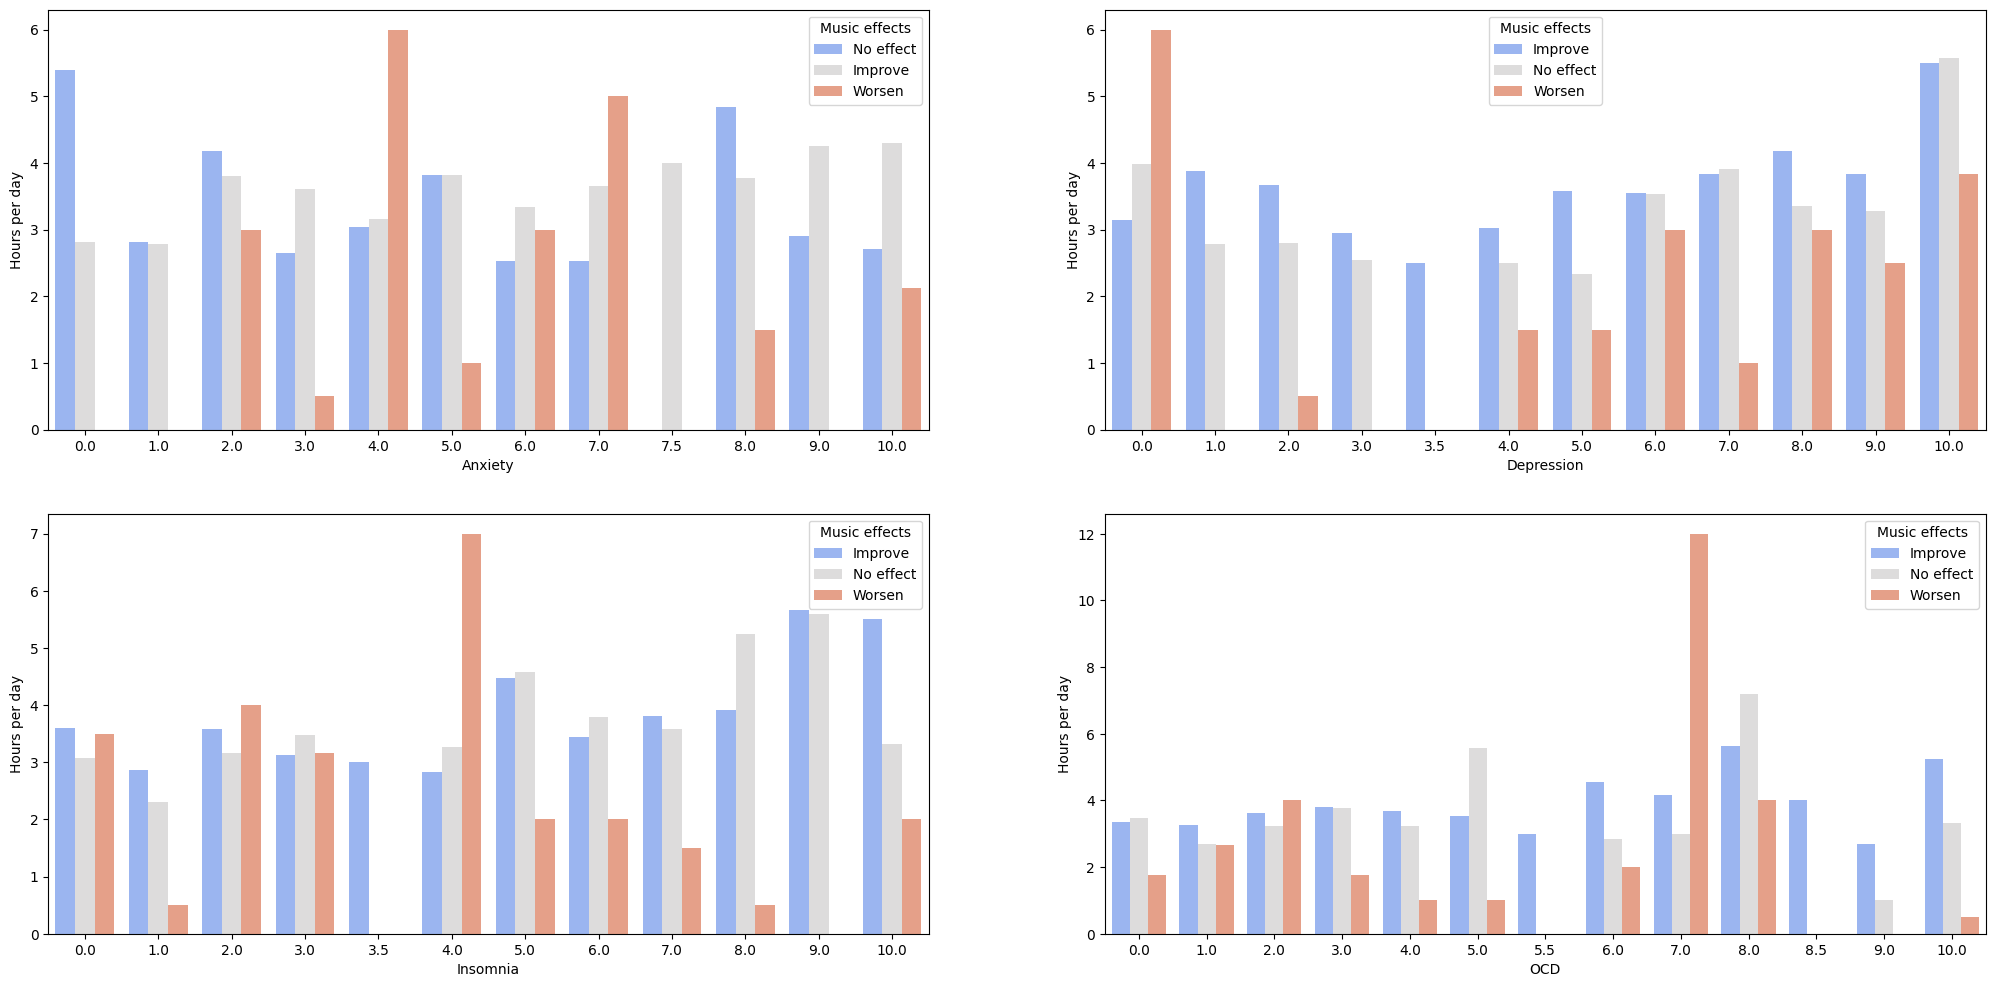

In [14]:
figure,axes=plt.subplots(2,2,figsize=(25,12))
sns.barplot(ax=axes[0,0],x=df['Anxiety'],y=df['Hours per day'],hue=df['Music effects'],palette="coolwarm", errorbar=None)
sns.barplot(ax=axes[0,1],x=df['Depression'],y=df['Hours per day'],hue=df['Music effects'],palette="coolwarm", errorbar=None)
sns.barplot(ax=axes[1,0],x=df['Insomnia'],y=df['Hours per day'],hue=df['Music effects'],palette="coolwarm", errorbar=None)
sns.barplot(ax=axes[1,1],x=df['OCD'],y=df['Hours per day'],hue=df['Music effects'],palette="coolwarm", errorbar=None)
plt.show()

In [15]:
conditions = [ #based on Kemenkes RI & range dataset -> 10 - 89
    (df['Age'] >= 10) & (df['Age'] <= 18),
    (df['Age'] >= 19) & (df['Age'] <= 59),
    (df['Age'] >= 60)
]

labels = ['Teenager', 'Adults', 'Seniors']
df['Age group'] = np.select(conditions, labels, default='Unknown')

print(df['Age group'].value_counts())


Age group
Adults      470
Teenager    238
Seniors      27
Unknown       1
Name: count, dtype: int64


In [16]:
# people = (
#     df.groupby('Age group')[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
#     .apply(lambda x: x.stack().value_counts())
#     .reset_index(name='total')
#     .rename(columns={'level_1': 'Condition'}))

# people = people.rename(columns={'level_0': 'Age group'})
# people

people = (
    df.melt(id_vars=['Age group'], value_vars=['Anxiety', 'Depression', 'Insomnia', 'OCD'])
    .groupby(['Age group', 'variable'])['value']
    .value_counts()
    .reset_index(name='total')
    .rename(columns={'variable': 'Condition', 'value': 'Level'})
)
people = people[(people['Level'] > 5.0) & (people['Age group'] != 'Unknown')] #only the prominent level
people

,Age group,Condition,Level,total
0,Adults,Anxiety,8.0,73
1,Adults,Anxiety,7.0,72
2,Adults,Anxiety,6.0,57
3,Adults,Anxiety,10.0,46
5,Adults,Anxiety,9.0,41
11,Adults,Depression,7.0,65
12,Adults,Depression,6.0,59
14,Adults,Depression,8.0,52
17,Adults,Depression,10.0,35
21,Adults,Depression,9.0,27


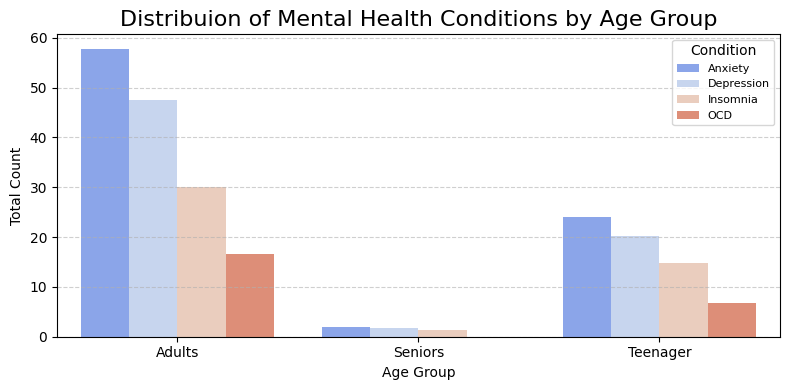

In [17]:
plt.figure(figsize=(8, 4))

sns.barplot(
    data=people,
    x='Age group',
    y='total',
    hue='Condition',
    palette='coolwarm',
    errorbar=None)

plt.title('Distribuion of Mental Health Conditions by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Total Count', fontsize=10)
plt.legend(title='Condition', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

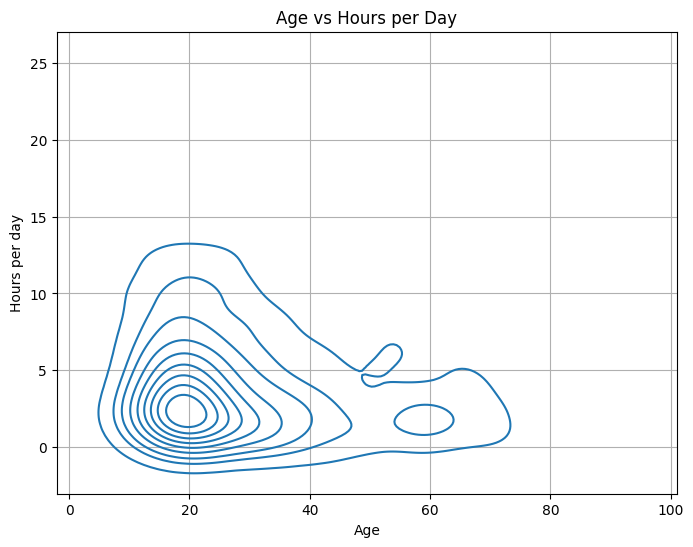

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.kdeplot(x='Age', y='Hours per day', data=df, ax=ax)

ax.set_title('Age vs Hours per Day')
ax.grid(True)
plt.show()

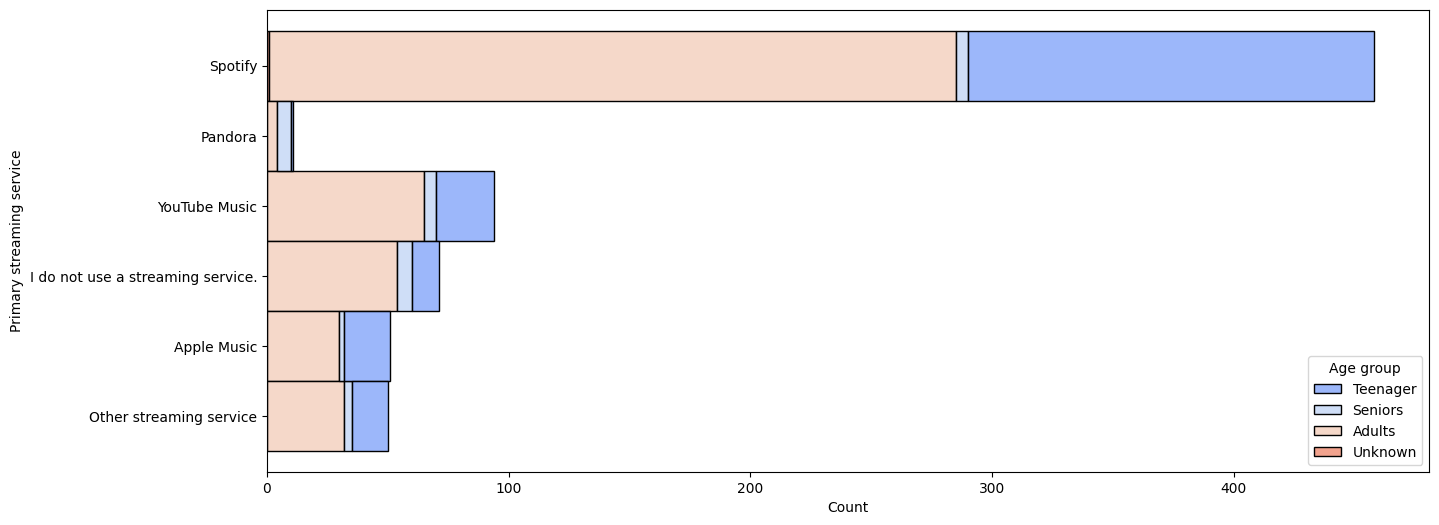

In [19]:
plt.figure(figsize=(15, 6))
sns.histplot(df, y="Primary streaming service",palette='coolwarm',hue="Age group", multiple="stack")
plt.show()

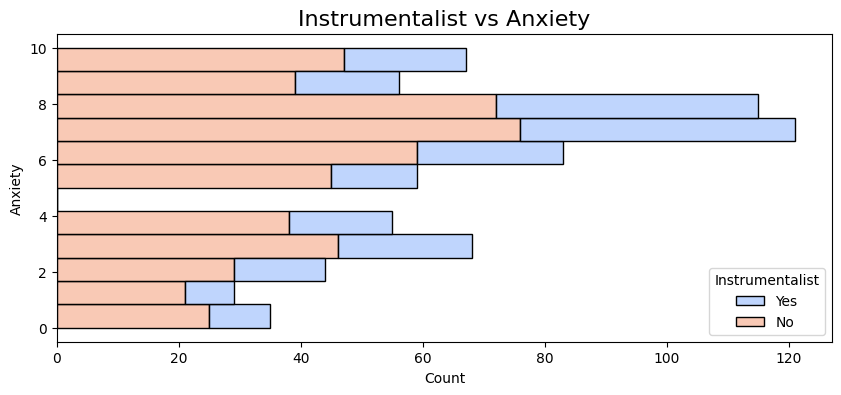

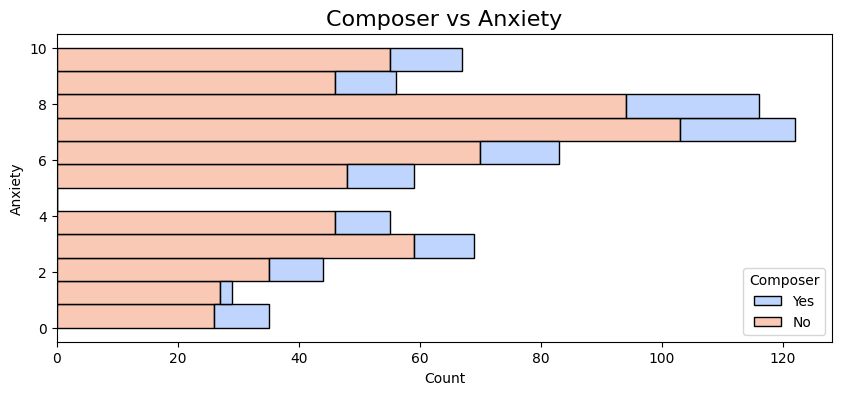

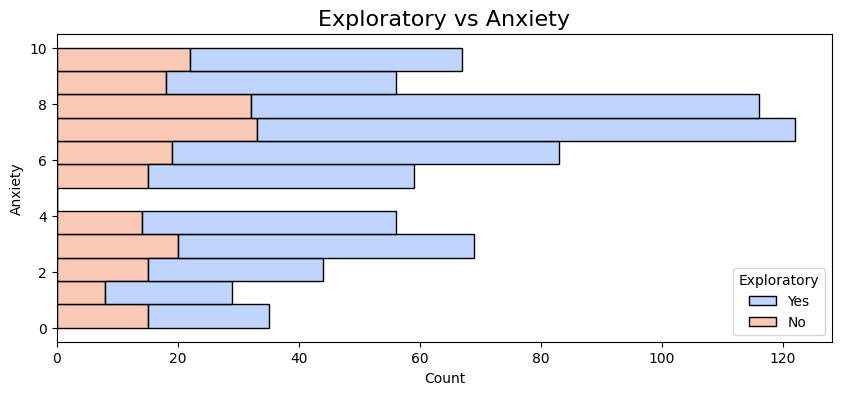

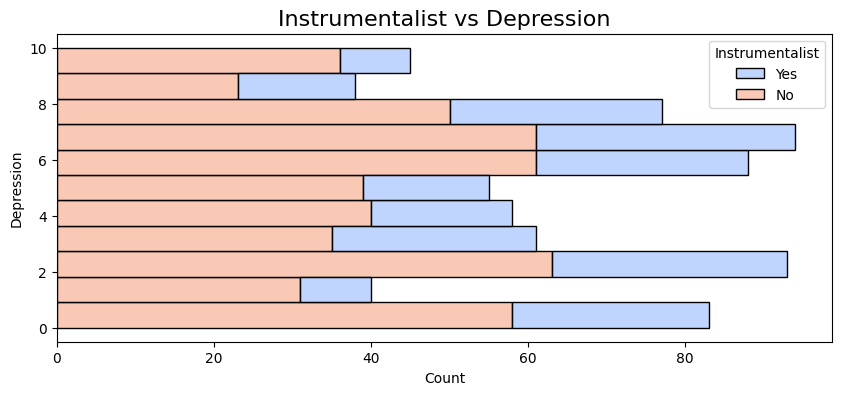

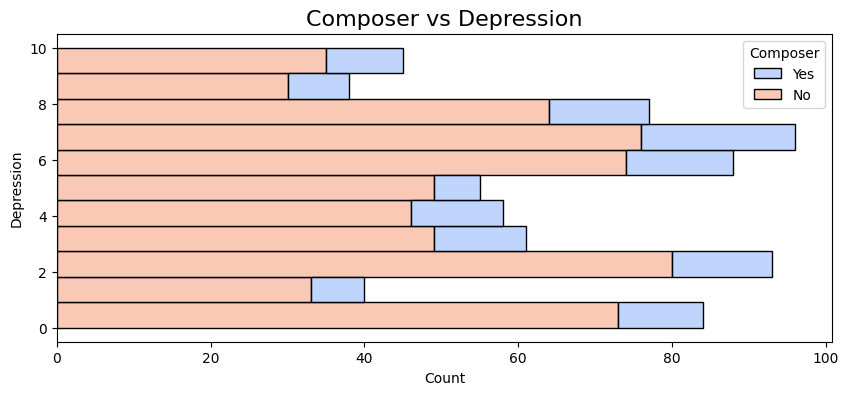

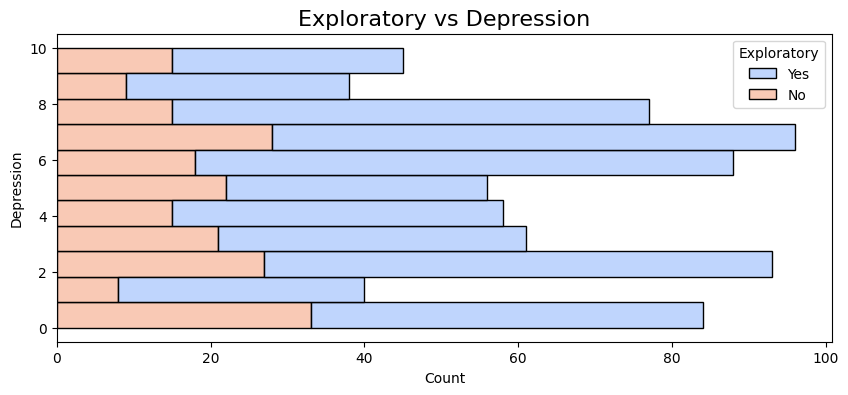

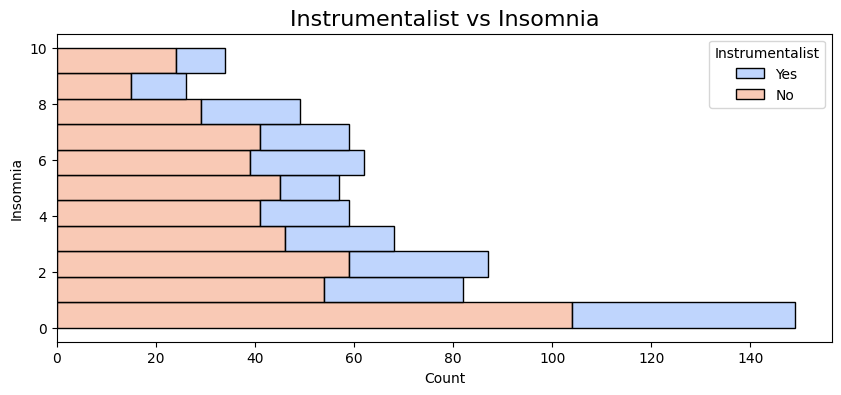

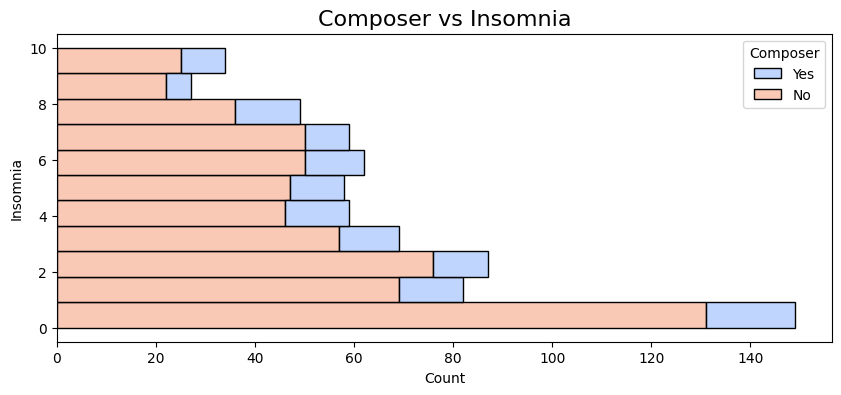

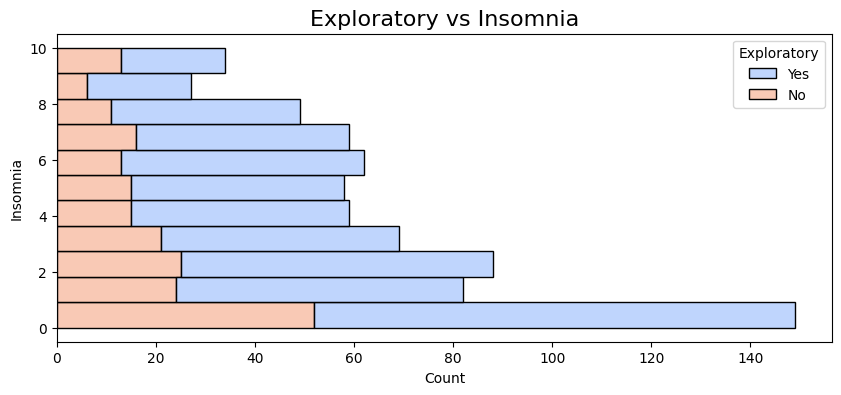

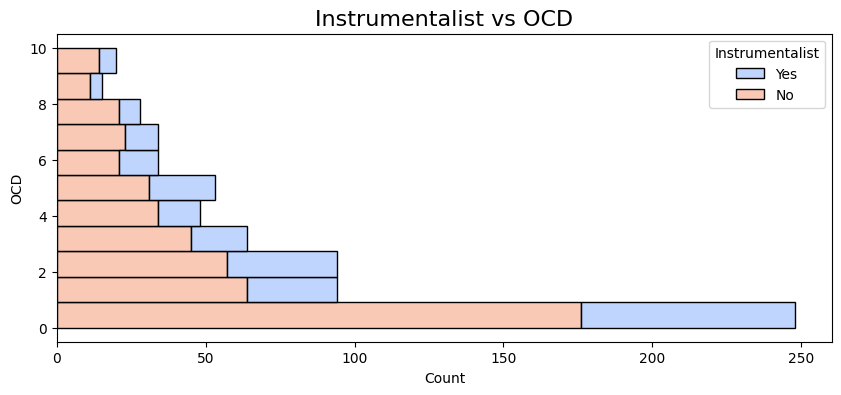

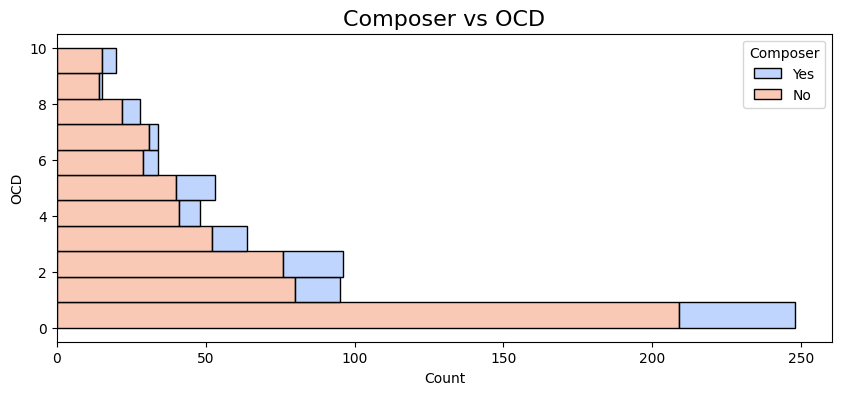

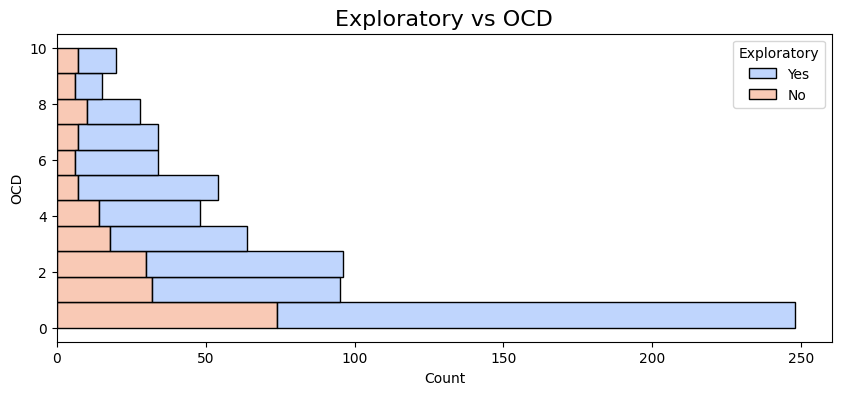

In [20]:
hue_cols = ['Instrumentalist', 'Composer', 'Exploratory']
y_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

for y_col in y_cols:
    for hue_col in hue_cols:
        plt.figure(figsize=(10, 4))
        sns.histplot(df, y=y_col, palette='coolwarm', hue=hue_col, multiple="stack")

        plt.title(f"{hue_col} vs {y_col}", fontsize=16)
        plt.show()

In [21]:
missing_num_cols = ['Age', 'BPM']

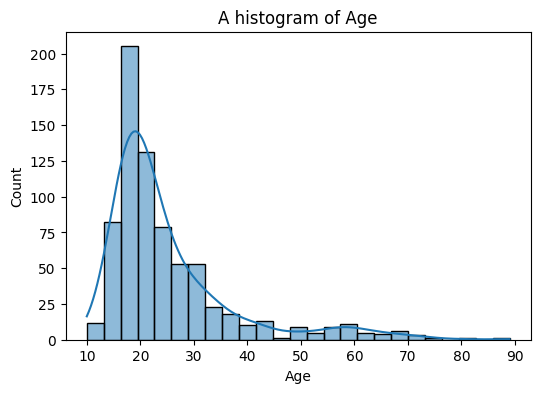

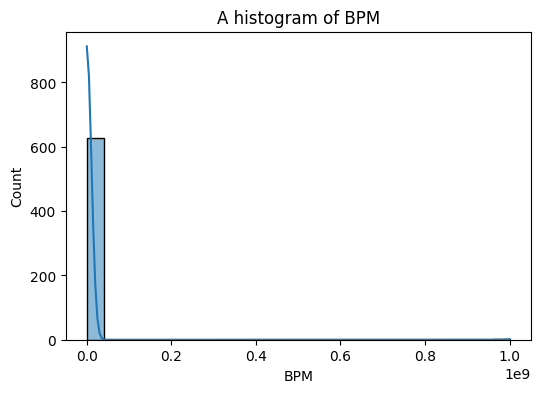

In [22]:
for col in missing_num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=25, kde=True)

    # Set labels and title
    plt.xlabel(col)
    plt.title(f"A histogram of {col}")

    # Show the plot
    plt.show()


Both are left skewed, use median to impute

In [23]:
missing_num_cols = ['Age', 'BPM']
for col in missing_num_cols:
    col_mean = df[col].median()
    df[col] = df[col].fillna(col_mean)

In [24]:
missing_cat_cols = ['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Foreign languages', 'Music effects']
for col in missing_cat_cols:
    col_mode = df[col].mode()[0]
    df[col] = df[col].fillna(col_mode)

In [25]:
for i in cat_cols:
    print(f'{i}: {df[i].nunique()}')
    print(df[i].unique())

Primary streaming service: 6
['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service']
While working: 2
['Yes' 'No']
Instrumentalist: 2
['Yes' 'No']
Composer: 2
['Yes' 'No']
Fav genre: 16
['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Country' 'EDM'
 'Hip hop' 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']
Exploratory: 2
['Yes' 'No']
Foreign languages: 2
['Yes' 'No']
Frequency [Classical]: 4
['Rarely' 'Sometimes' 'Never' 'Very frequently']
Frequency [Country]: 4
['Never' 'Sometimes' 'Very frequently' 'Rarely']
Frequency [EDM]: 4
['Rarely' 'Never' 'Very frequently' 'Sometimes']
Frequency [Folk]: 4
['Never' 'Rarely' 'Sometimes' 'Very frequently']
Frequency [Gospel]: 4
['Never' 'Sometimes' 'Rarely' 'Very frequently']
Frequency [Hip hop]: 4
['Sometimes' 'Rarely' 'Never' 'Very frequently']
Frequency [Jazz]: 4
['Never' 'Very frequently' 'Rarely' 'Sometimes']
Frequency [K pop]: 4
['Very frequently' 'Rarely' 'Sometimes

In [26]:
freq_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
             'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
             'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
             'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
nom_cols = ['Primary streaming service','Fav genre']
bin_cols = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']

In [27]:
# Ordinal Encoding for freq_cols
freq_mapping = [["Never", "Rarely", "Sometimes", "Very frequently"]] * len(freq_cols)
ordinal_encoder = OrdinalEncoder(categories=freq_mapping)
df[freq_cols] = ordinal_encoder.fit_transform(df[freq_cols])

# Ordinal Encoding for 'Music effects'
effect_mapping = [["Worsen", "No effect", "Improve"]]
ordinal_encoder = OrdinalEncoder(categories=effect_mapping)
df['Music effects'] = ordinal_encoder.fit_transform(df[['Music effects']])

# Label Encoding for nom_cols (Nominal Columns)
label_encoder = LabelEncoder()
for col in nom_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Binary Encoding for bin_cols
bin_mapping = {"Yes": 1, "No": 0}
for col in bin_cols:
    df[col] = df[col].map(bin_mapping)

In [28]:
# df['Anxiety'] = df['Anxiety'].astype(int)
# df['Anxiety'] = (df['Anxiety'] > 5).astype(int)
target_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
df[target_cols] = (1 + (df[target_cols] - 1) / 2).astype(int)

In [29]:
for i in df.columns:
    print(f'{i}: {df[i].nunique()}')
    print(df[i].unique())

Age: 61
[18. 63. 61. 21. 19. 17. 16. 15. 14. 20. 26. 23. 37. 36. 24. 22. 42. 25.
 32. 29. 41. 31. 33. 30. 43. 28. 34. 13. 35. 27. 53. 49. 60. 38. 44. 40.
 64. 56. 59. 10. 12. 54. 57. 69. 72. 73. 39. 58. 67. 70. 55. 48. 71. 74.
 51. 65. 80. 50. 68. 46. 89.]
Primary streaming service: 6
[4 3 5 1 0 2]
Hours per day: 27
[ 3.    1.5   4.    2.5   5.    1.    6.    8.    2.   12.   24.    0.5
  0.25  0.    7.   10.    9.    0.7   4.5  20.   16.   15.   14.   13.
  0.1  11.   18.  ]
While working: 2
[1 0]
Instrumentalist: 2
[1 0]
Composer: 2
[1 0]
Fav genre: 16
[ 8 14 15  6 12  7  1  2  5 11 13  0 10  3  9  4]
Exploratory: 2
[1 0]
Foreign languages: 2
[1 0]
BPM: 135
[1.56000000e+02 1.19000000e+02 1.32000000e+02 8.40000000e+01
 1.07000000e+02 8.60000000e+01 6.60000000e+01 9.50000000e+01
 9.40000000e+01 1.55000000e+02 1.20000000e+02 1.25000000e+02
 8.80000000e+01 1.48000000e+02 1.03000000e+02 9.90000000e+01
 1.18000000e+02 7.90000000e+01 1.69000000e+02 1.36000000e+02
 1.01000000e+02 1.26000000e

In [30]:
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Age group
0,18.0,4,3.0,1,1,1,8,1,1,156.0,...,2.0,3.0,0.0,2.0,2,0,1,0,2.0,Teenager
1,63.0,3,1.5,1,0,0,14,1,0,119.0,...,2.0,1.0,3.0,1.0,4,1,1,1,2.0,Seniors
2,18.0,4,4.0,0,0,0,15,0,1,132.0,...,0.0,1.0,1.0,3.0,4,4,5,1,1.0,Teenager
3,61.0,5,2.5,1,0,1,6,1,1,84.0,...,2.0,0.0,0.0,0.0,5,4,2,2,2.0,Seniors
4,18.0,4,4.0,1,0,0,12,1,0,107.0,...,3.0,3.0,0.0,1.0,4,1,3,5,2.0,Teenager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,4,2.0,1,1,0,14,1,1,120.0,...,0.0,1.0,3.0,0.0,4,3,0,5,2.0,Teenager
732,18.0,4,1.0,1,1,0,11,1,1,160.0,...,0.0,0.0,2.0,2.0,2,1,1,3,2.0,Teenager
733,19.0,2,6.0,1,0,1,13,1,0,120.0,...,2.0,2.0,1.0,1.0,1,1,1,1,2.0,Adults
734,19.0,4,5.0,1,1,0,0,0,0,170.0,...,0.0,0.0,0.0,2.0,1,2,1,1,2.0,Adults


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           736 non-null    float64
 1   Primary streaming service     736 non-null    int64  
 2   Hours per day                 736 non-null    float64
 3   While working                 736 non-null    int64  
 4   Instrumentalist               736 non-null    int64  
 5   Composer                      736 non-null    int64  
 6   Fav genre                     736 non-null    int64  
 7   Exploratory                   736 non-null    int64  
 8   Foreign languages             736 non-null    int64  
 9   BPM                           736 non-null    float64
 10  Frequency [Classical]         736 non-null    float64
 11  Frequency [Country]           736 non-null    float64
 12  Frequency [EDM]               736 non-null    float64
 13  Frequ

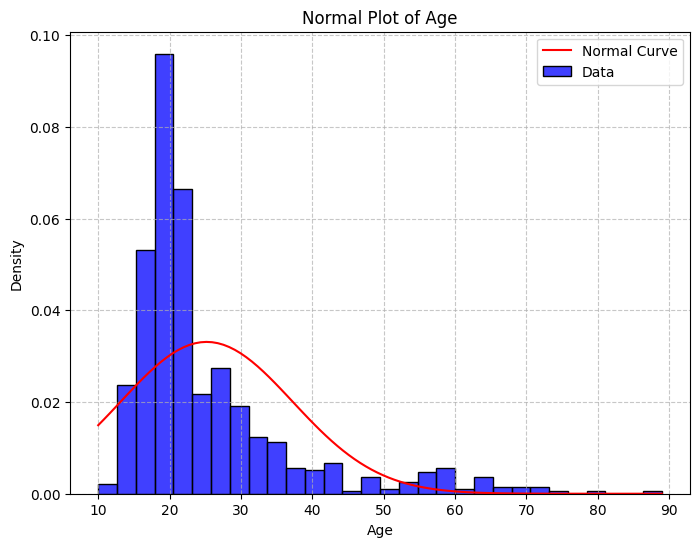

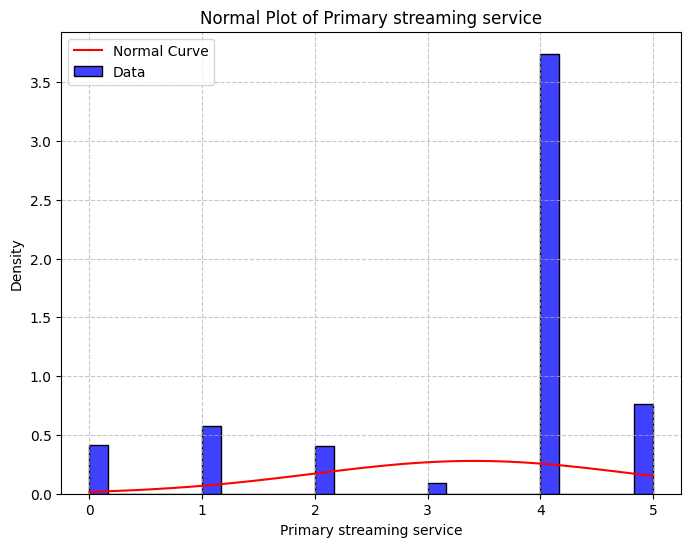

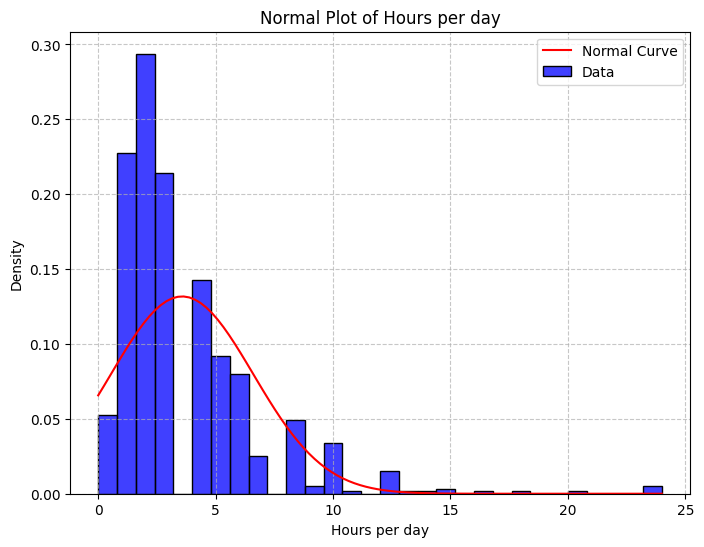

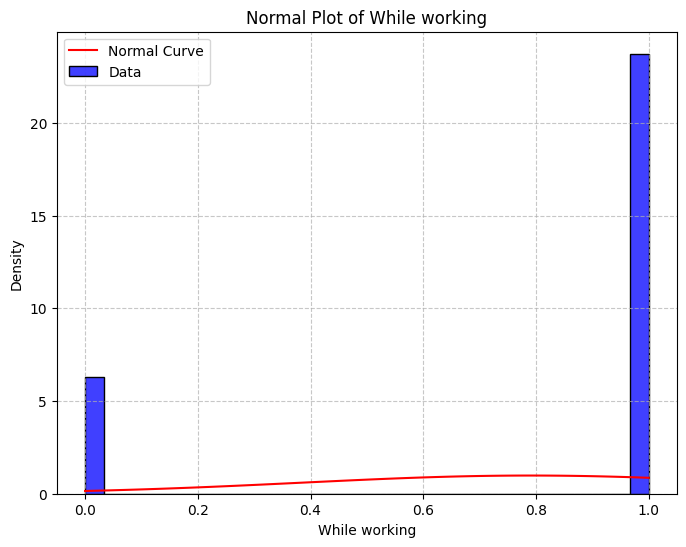

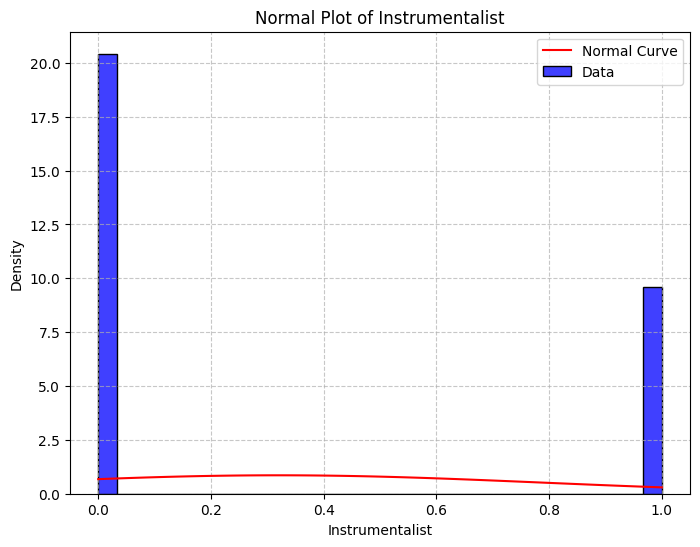

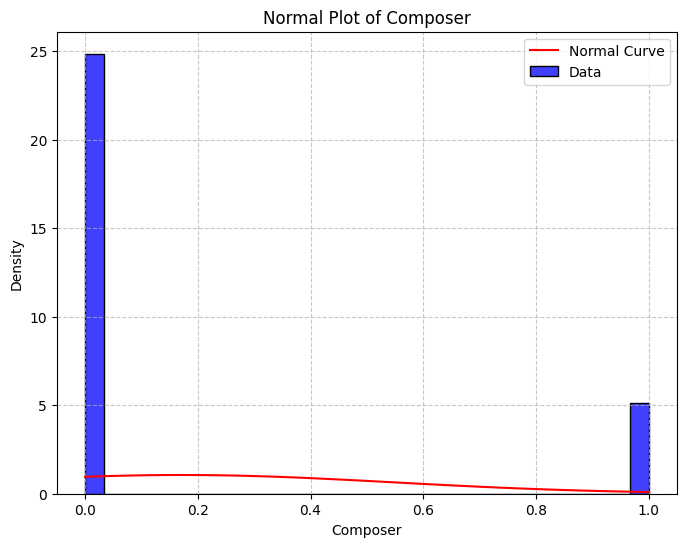

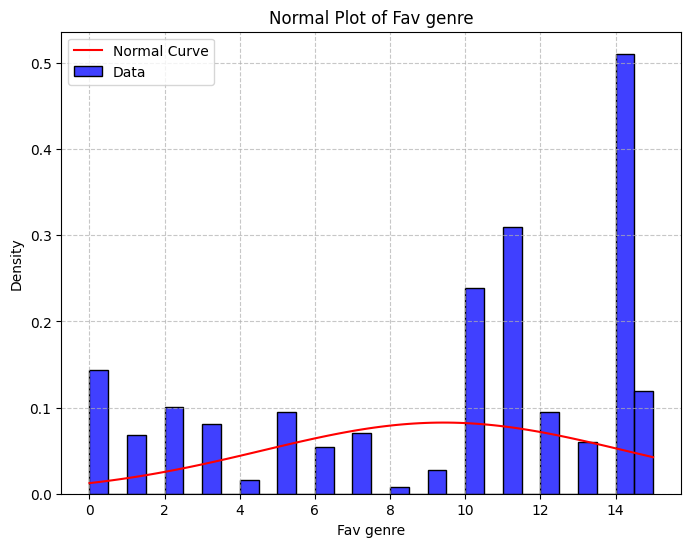

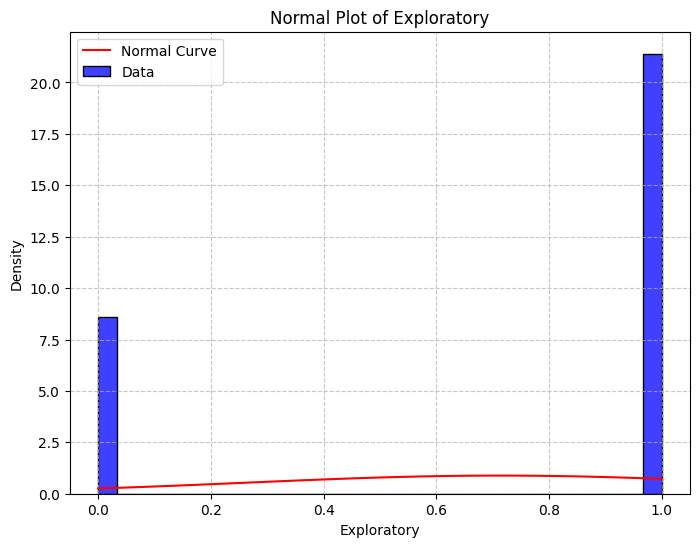

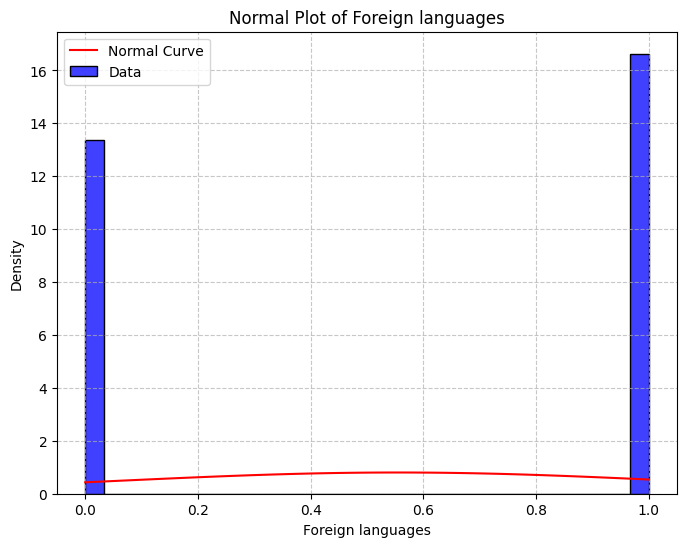

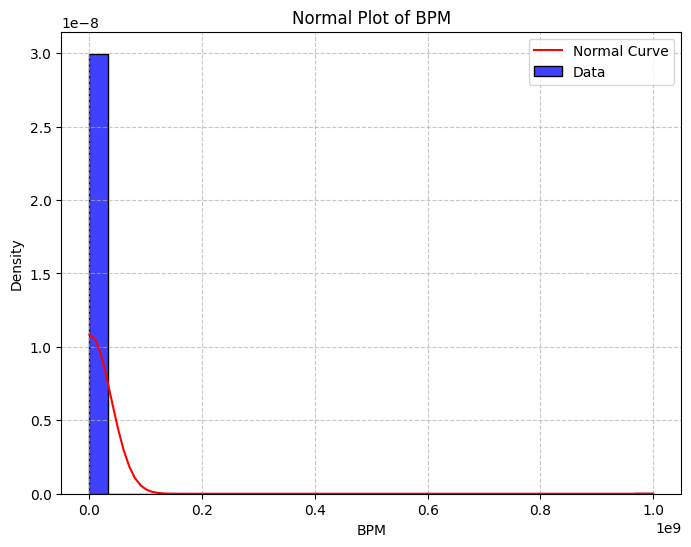

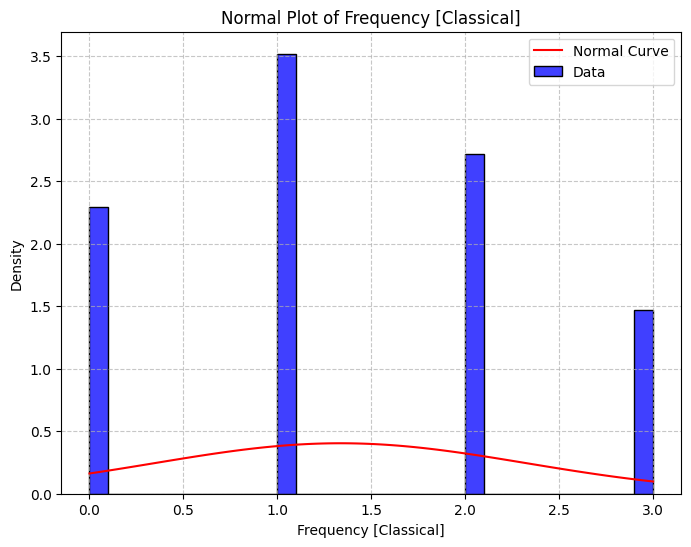

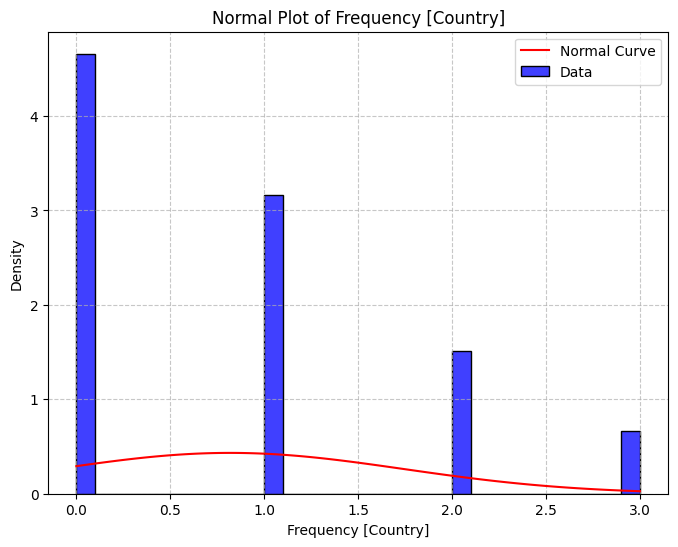

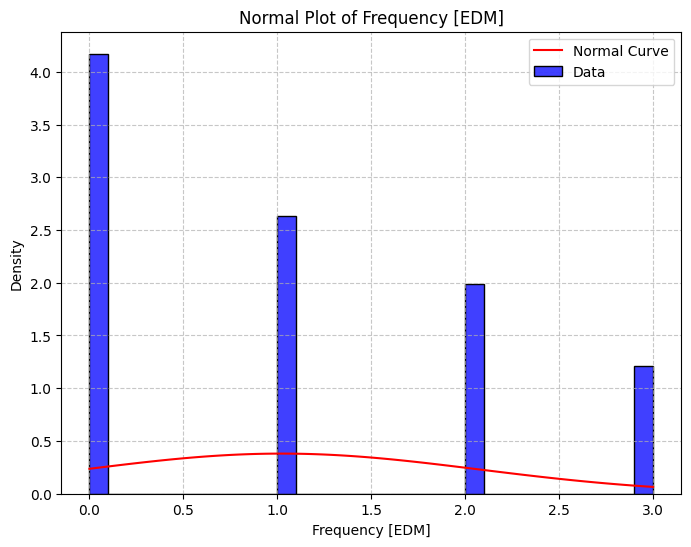

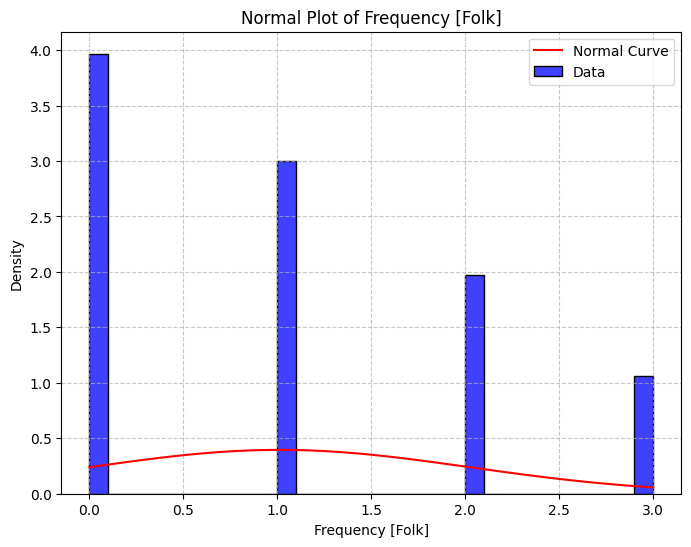

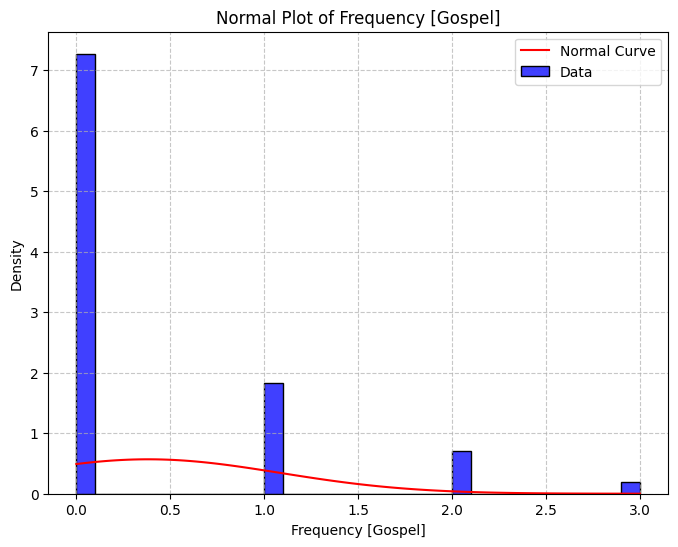

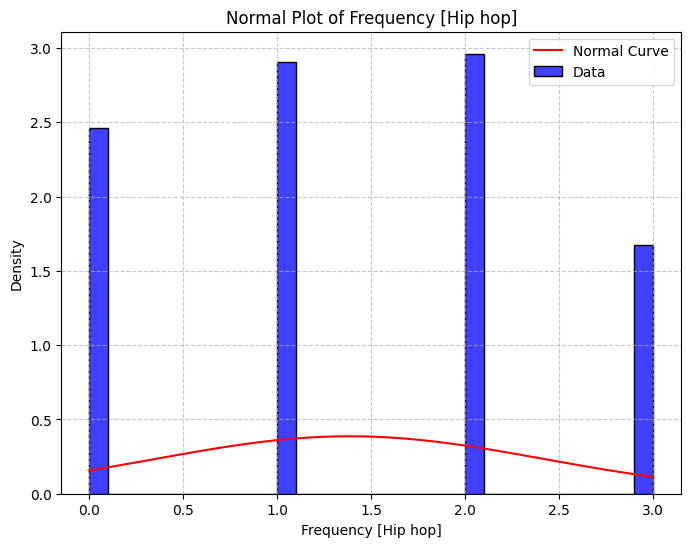

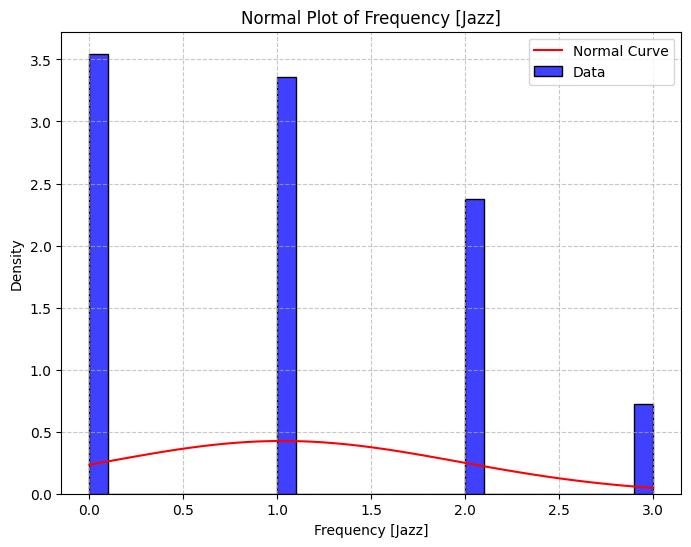

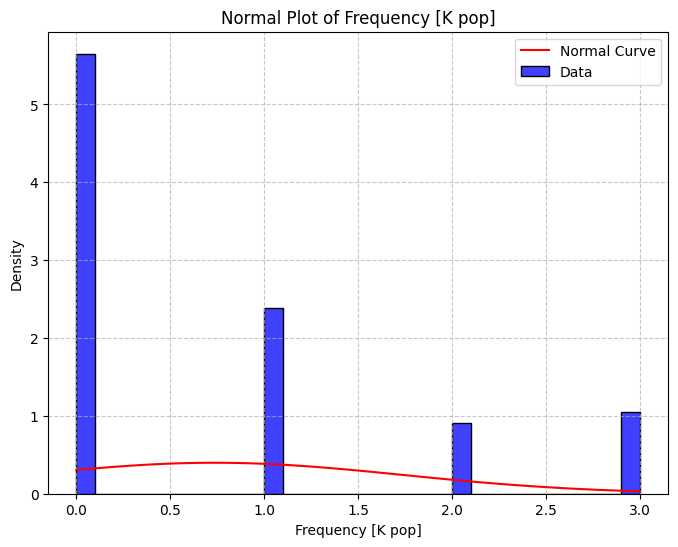

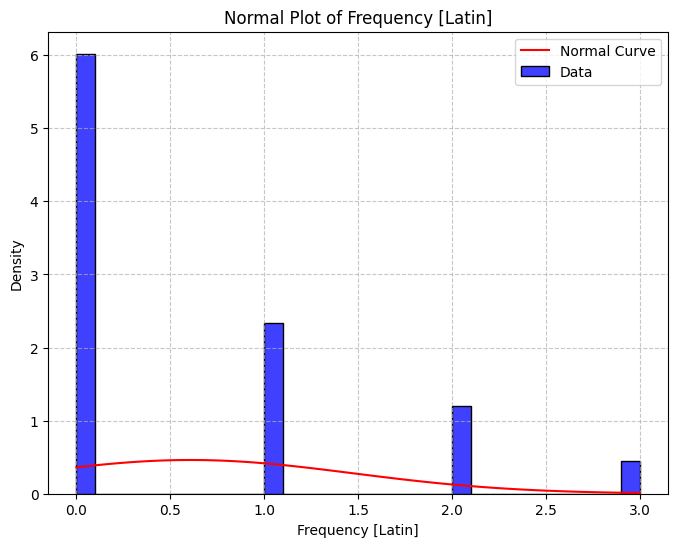

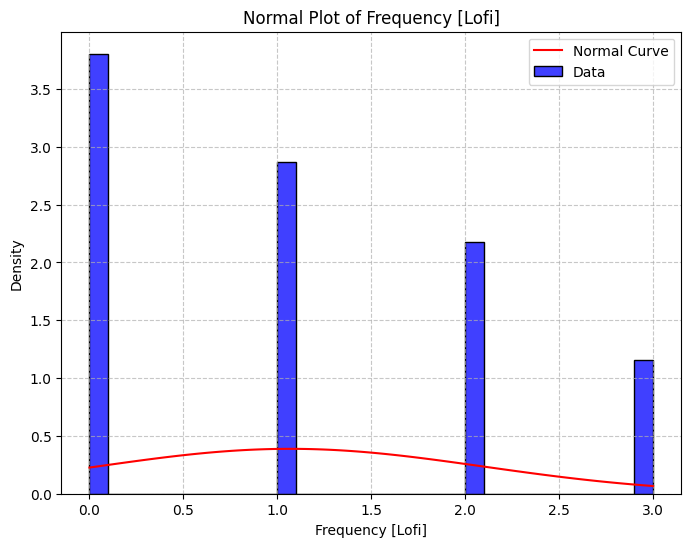

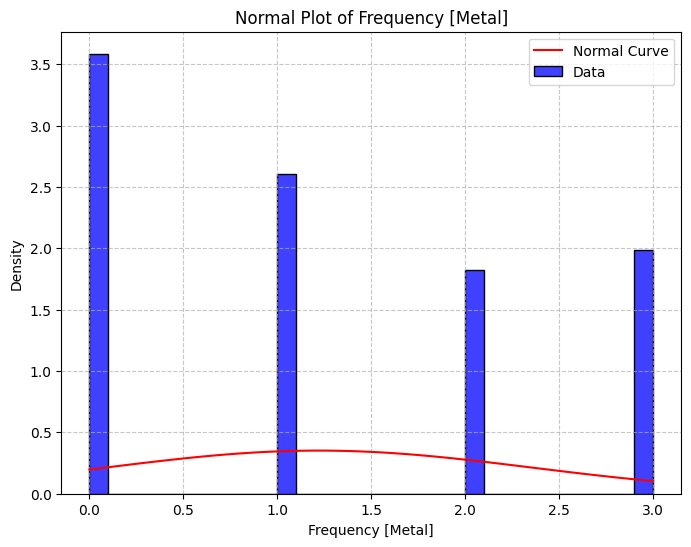

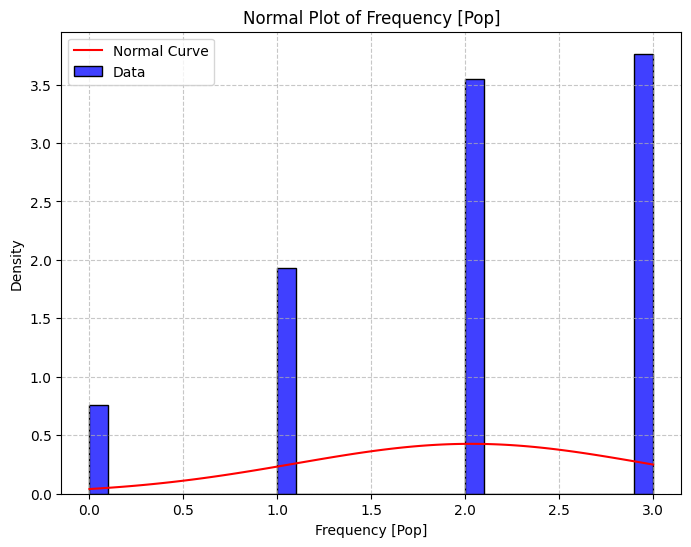

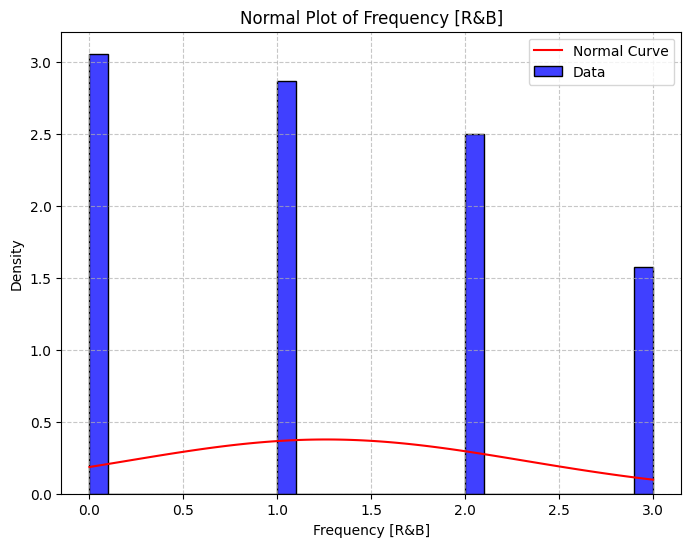

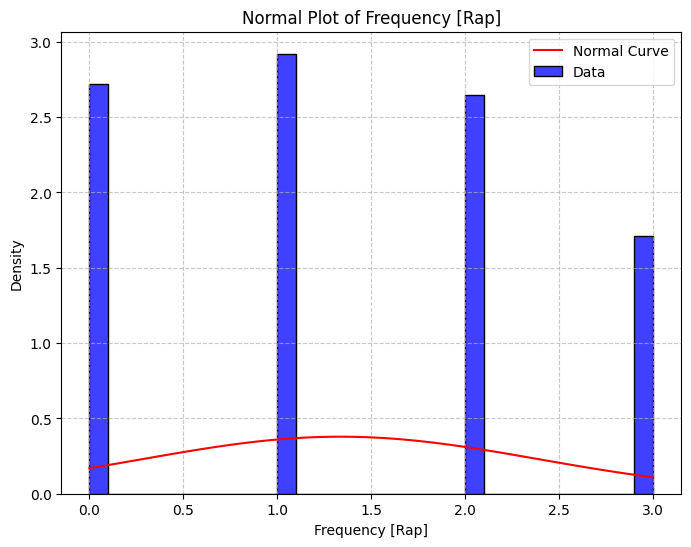

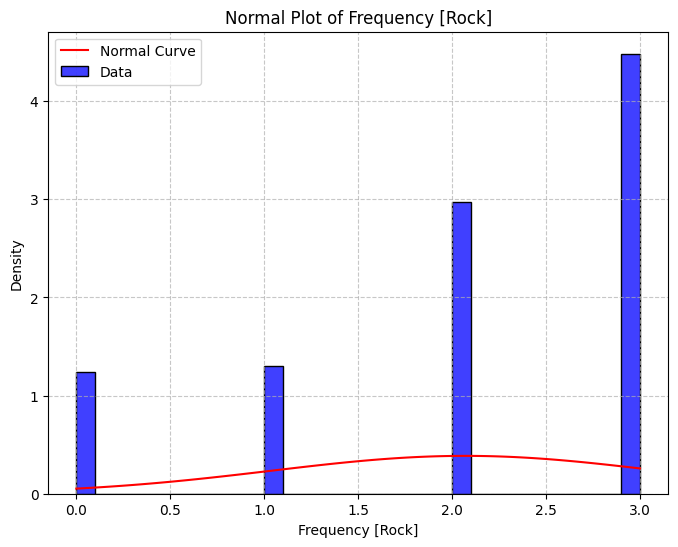

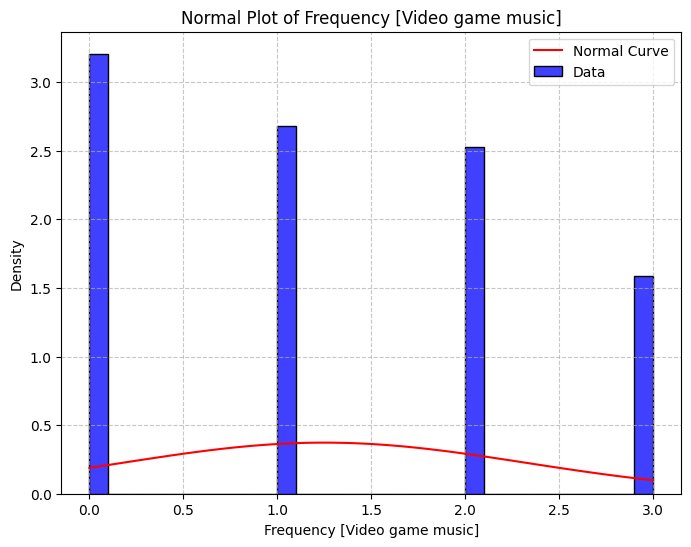

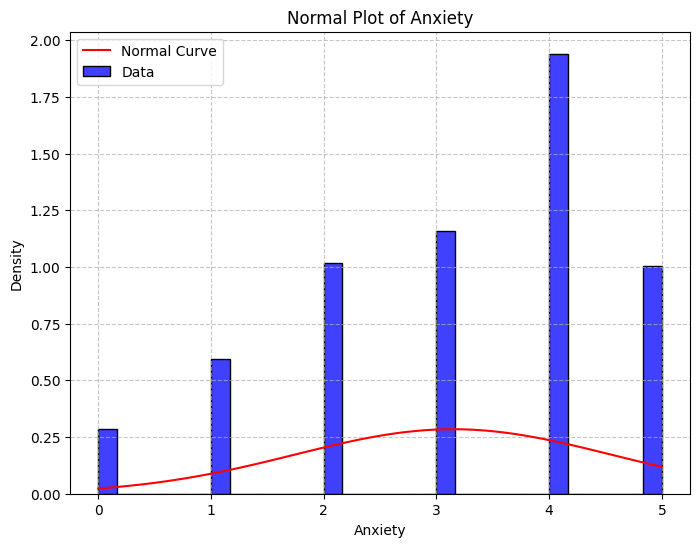

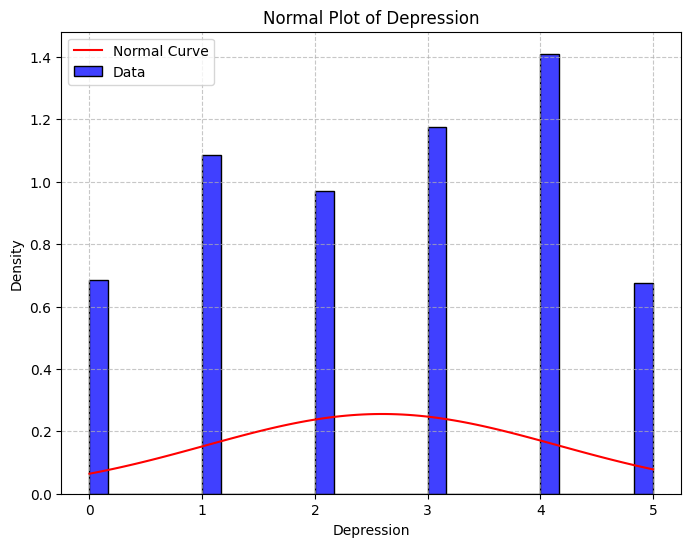

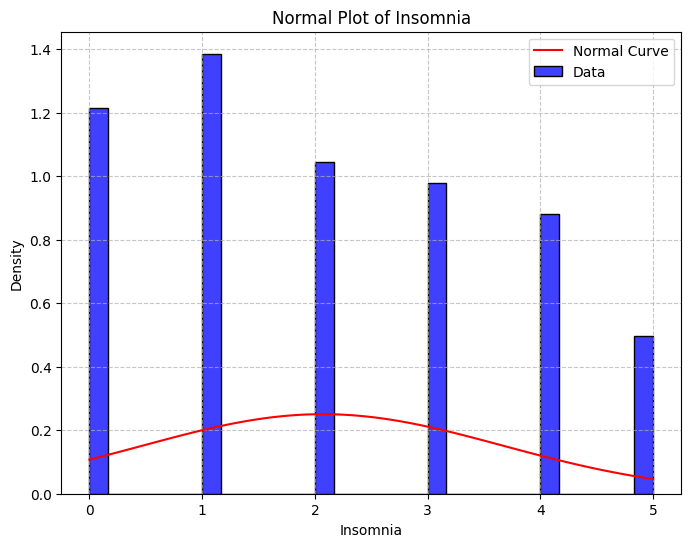

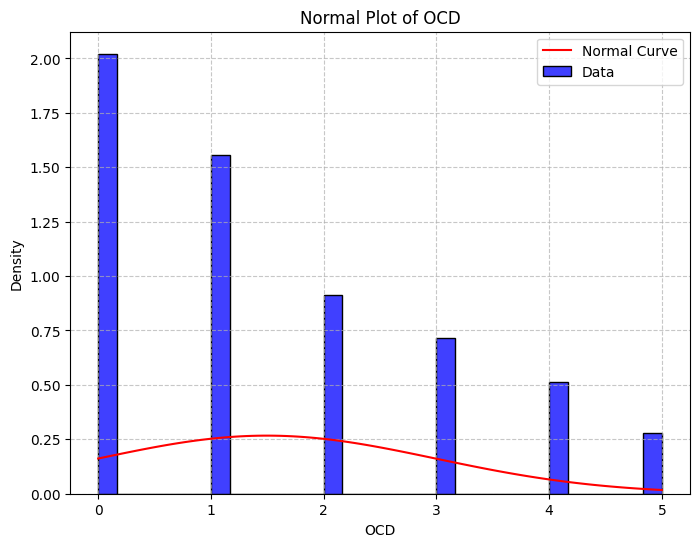

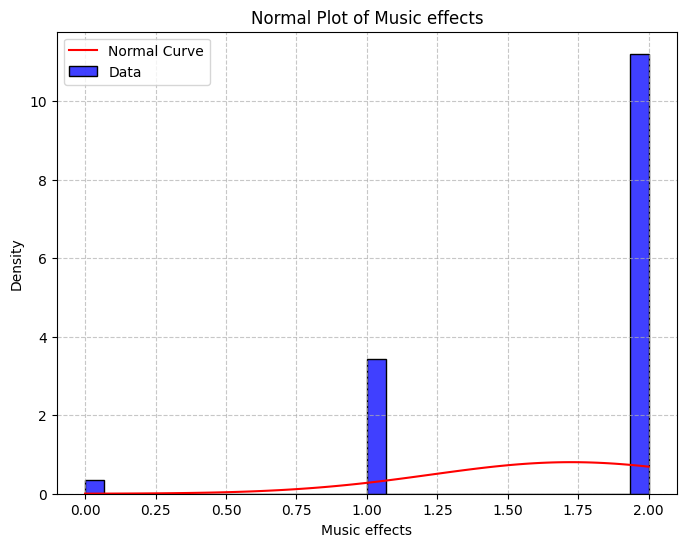

In [32]:
# Loop through each column
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
        plt.figure(figsize=(8, 6))

        # Plot histogram
        sns.histplot(df[column], kde=False, color='blue', bins=30, label='Data', stat='density')

        # Overlay normal distribution
        mean = df[column].mean()
        std = df[column].std()
        x = np.linspace(df[column].min(), df[column].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std), color='red', label='Normal Curve')

        # Add labels and title
        plt.title(f"Normal Plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Density")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

In [33]:
# df.to_csv('../dataset/final_dataset.csv', index=False)

In [34]:
# pip install adix

# Modeling

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
# Train-test split
X = df.drop(['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Age group'], axis=1)
y1 = df['Anxiety']

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.11      0.10      0.11        20
           2       0.07      0.10      0.08        20
           3       0.14      0.17      0.16        23
           4       0.34      0.19      0.24        53
           5       0.15      0.12      0.13        26

    accuracy                           0.14       148
   macro avg       0.14      0.11      0.12       148
weighted avg       0.20      0.14      0.16       148



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.00      0.00      0.00        20
           2       0.17      0.25      0.20        20
           3       0.10      0.09      0.09        23
           4       0.50      0.40      0.44        53
           5       0.17      0.19      0.18        26

    accuracy                           0.24       148
   macro avg       0.20      0.21      0.20       148
weighted avg       0.26      0.24      0.24       148



In [44]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

gb_model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=42,max_features=5)
gb_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.11      0.10      0.11        20
           2       0.07      0.10      0.08        20
           3       0.14      0.17      0.16        23
           4       0.34      0.19      0.24        53
           5       0.15      0.12      0.13        26

    accuracy                           0.14       148
   macro avg       0.14      0.11      0.12       148
weighted avg       0.20      0.14      0.16       148



In [45]:
correlation = X.corrwith(y1).abs()

top_10_features = correlation.sort_values(ascending=False).head(10)

print(top_10_features)

Age                             0.174762
Frequency [Pop]                 0.104409
Frequency [Video game music]    0.104093
Music effects                   0.087540
Frequency [Folk]                0.086174
Frequency [Lofi]                0.081776
Frequency [Rock]                0.079118
Foreign languages               0.072409
Frequency [Metal]               0.067725
Fav genre                       0.066918
dtype: float64


In [46]:
# splitting for top 10 only
X1_top = df[['Age', 'Frequency [Pop]', 'Frequency [Video game music]', 'Music effects', 'Frequency [Folk]', 'Frequency [Lofi]', 'Frequency [Rock]', 'Foreign languages', 'Frequency [Metal]', 'Fav genre']]
y1 = df['Anxiety']
X_train, X_test, y_train, y_test = train_test_split(X1_top, y1, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.25      0.05      0.08        20
           2       0.21      0.15      0.18        20
           3       0.12      0.04      0.06        23
           4       0.38      0.81      0.52        53
           5       0.00      0.00      0.00        26

    accuracy                           0.32       148
   macro avg       0.16      0.18      0.14       148
weighted avg       0.22      0.32      0.23       148



In [48]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.17      0.14         6
           1       0.19      0.15      0.17        20
           2       0.05      0.05      0.05        20
           3       0.17      0.17      0.17        23
           4       0.39      0.38      0.38        53
           5       0.11      0.12      0.11        26

    accuracy                           0.22       148
   macro avg       0.17      0.17      0.17       148
weighted avg       0.22      0.22      0.22       148



In [49]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

gb_model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=42,max_features=5)
gb_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.25      0.05      0.08        20
           2       0.21      0.15      0.18        20
           3       0.12      0.04      0.06        23
           4       0.38      0.81      0.52        53
           5       0.00      0.00      0.00        26

    accuracy                           0.32       148
   macro avg       0.16      0.18      0.14       148
weighted avg       0.22      0.32      0.23       148

